In [3]:
# manipulation des données
import numpy as np
import pandas as pd

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes
import warnings
warnings.filterwarnings('ignore')

# permet d'afficher toutes les colonnes
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('../Data/5.RFM_augmented.csv')
df = df.drop(columns='Monetary_bis_x')
df

,customer_unique_id,order_status,review_score,Recency_x,Frequency_x,Monetary
0,7c396fd4830fd04220f754e42b4e5bff,7,4.0,27.289810,2,1.303348
1,af07308b275d755c9edb36a90c618231,7,4.0,14.162002,1,1.601216
2,3a653a41f6f9fc3d2a113cf8398680e8,7,5.0,13.051752,1,1.647432
3,7c142cf63193a1473d2e66489a9ae977,7,5.0,25.737451,1,1.457031
4,72632f0f9dd73dfee390c9b22eb56dd6,7,5.0,22.505471,1,1.220373
...,...,...,...,...,...,...
95358,6359f309b166b0196dbf7ad2ac62bb5a,7,5.0,33.093157,1,1.494089
95359,da62f9e57a76d978d02ab5362c509660,7,4.0,22.786720,1,1.663569
95360,737520a9aad80b3fbbdad19b66b37b30,7,5.0,28.407875,1,1.723809
95361,5097a5312c8b157bb7be58ae360ef43c,7,2.0,23.908753,1,1.686544


In [5]:
df_sample = df.sample(10000, replace=False)
df_sample.shape

(10000, 6)

In [6]:
X = df_sample.drop('customer_unique_id', axis=1).values
y = df_sample['customer_unique_id'].values
print(X.shape)
print(y.shape)

(10000, 5)
(10000,)


In [7]:
from sklearn import preprocessing

X_norm1 = preprocessing.scale(X)
print(X_norm1.shape)

(10000, 5)


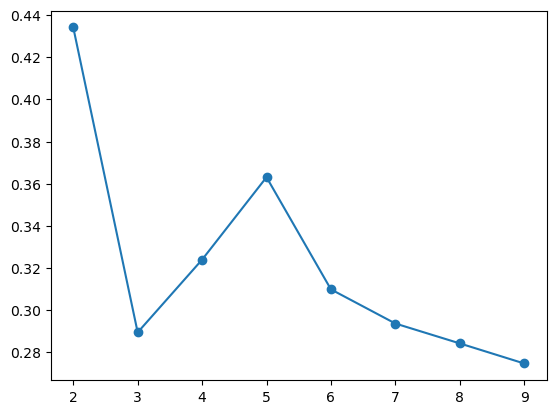

In [8]:
from sklearn import cluster, metrics

silhouettes = []
# on regarde de 2 à 10 clusters
for num_clusters in range (2, 10):
    cls = cluster.KMeans(n_clusters=num_clusters, n_init=1, init='random')
    cls.fit(X_norm1)
    silh = metrics.silhouette_score(X_norm1, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')

In [9]:
from sklearn import decomposition
from sklearn import preprocessing

X = df.drop('customer_unique_id', axis=1).values
X_norm1 = preprocessing.scale(X)

pca = decomposition.PCA(n_components=2)
pca.fit(X_norm1)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm1)

[0.35359344 0.5589781 ]


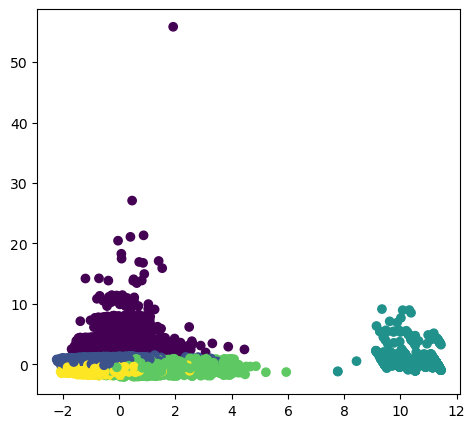

In [10]:
from sklearn import cluster, metrics
import time

fig = plt.figure(figsize=(12, 5))

cls1 = cluster.KMeans(n_clusters=5)
scoring_time_start1 = time.time()
cls1.fit(X_norm1)
scoring_time_end1 = time.time()

# 1 figure en ordonné, 2 figures en abscisse
# et on s'occupe de la première figure
ax = fig.add_subplot(121)

# on observe la première et la deuxième composante
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls1.labels_)

In [11]:
from sklearn import decomposition

X = df.drop('customer_unique_id', axis=1).values
X_norm1 = preprocessing.scale(X)

pca = decomposition.PCA(n_components=3)
pca.fit(X_norm1)

print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm1)

[0.35359344 0.5589781  0.75295331]


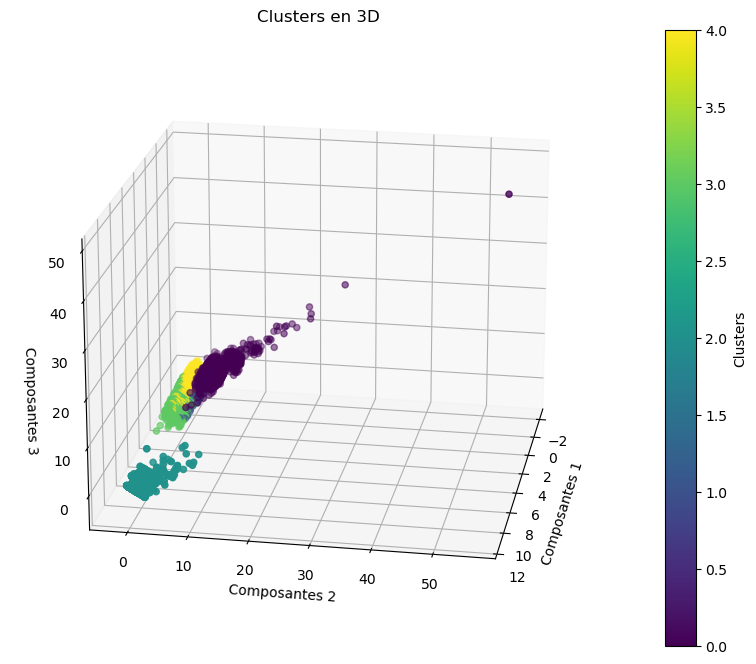

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_trans[:, 0],
                     X_trans[:, 1],
                     X_trans[:, 2],
                     c=cls1.labels_, cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Composantes 1')
ax.set_ylabel('Composantes 2')
ax.set_zlabel('Composantes 3')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()

In [13]:
df_kmeans1 = df.copy()
df_kmeans1['Cluster'] = cls1.labels_

df = pd.read_csv('../Data/5.RFM_augmented.csv')
df_kmeans1['Monetary_bis'] = df['Monetary_bis_x']

cluster_dataset = '../Data/6.K_means_5f.csv'
df_kmeans1.to_csv(cluster_dataset, index=False)

df_kmeans1

,customer_unique_id,order_status,review_score,Recency_x,Frequency_x,Monetary,Cluster,Monetary_bis
0,7c396fd4830fd04220f754e42b4e5bff,7,4.0,27.289810,2,1.303348,0,38.71
1,af07308b275d755c9edb36a90c618231,7,4.0,14.162002,1,1.601216,1,141.46
2,3a653a41f6f9fc3d2a113cf8398680e8,7,5.0,13.051752,1,1.647432,1,179.12
3,7c142cf63193a1473d2e66489a9ae977,7,5.0,25.737451,1,1.457031,4,72.20
4,72632f0f9dd73dfee390c9b22eb56dd6,7,5.0,22.505471,1,1.220373,1,28.62
...,...,...,...,...,...,...,...,...
95358,6359f309b166b0196dbf7ad2ac62bb5a,7,5.0,33.093157,1,1.494089,4,85.08
95359,da62f9e57a76d978d02ab5362c509660,7,4.0,22.786720,1,1.663569,1,195.00
95360,737520a9aad80b3fbbdad19b66b37b30,7,5.0,28.407875,1,1.723809,4,271.01
95361,5097a5312c8b157bb7be58ae360ef43c,7,2.0,23.908753,1,1.686544,3,220.58


In [13]:
from sklearn.metrics import davies_bouldin_score

duration_time1 = scoring_time_end1 - scoring_time_start1
silh_score1 = metrics.silhouette_score(X_norm1, cls1.labels_)
db_score1 = davies_bouldin_score(X_norm1, cls1.labels_)

In [14]:
import sys
sys.path.append('..')

In [15]:
from PythonFiles.Utils2 import *

In [16]:
resultats_modele1 = scoring_function('k_means_5f',
                                     duration_time1,
                                     silh_score1,
                                     cls1.inertia_,
                                     db_score1)
resultats_modele1

,Model_name,Time,Silhouette_score,Coef_distortion,Davies-bouldin
0,k_means_5f,0.416004,0.360865,137186.040153,0.781042


In [17]:
AllScore_function(resultats_modele1)

In [18]:
df_testx = pd.read_csv('../Data/0.global_scoring.csv')
df_testx

,Unnamed: 0,Model_name,Time,Silhouette_score,Coef_distortion,Davies-bouldin
0,NaN,k_means,0.318596,0.408218,98799.913722,0.686319
1,NaN,DBSCAN,60.573306,0.690714,0.000000,0.808110
2,NaN,CAH,86.984270,0.307232,0.000000,0.817826
3,NaN,k_means_5f,0.416004,0.360865,137186.040153,0.781042
